In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
from itertools import groupby

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pathturn11 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn1"
filesturn11= os.listdir(pathturn11)
pathturn12 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn2"
filesturn12= os.listdir(pathturn12)
pathturn13 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn3"
filesturn13= os.listdir(pathturn13)
pathturn14 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn4"
filesturn14= os.listdir(pathturn14)
pathturn15 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn5"
filesturn15= os.listdir(pathturn15)
pathturn16 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn6"
filesturn16= os.listdir(pathturn16)
pathturn17 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn7"
filesturn17= os.listdir(pathturn17)
pathturn18 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn8"
filesturn18= os.listdir(pathturn18)
pathturn19 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn9"
filesturn19= os.listdir(pathturn19)
pathturn110 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn10"
filesturn110= os.listdir(pathturn110)

pathturn11c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn1"
filesturn11c= os.listdir(pathturn11c)
pathturn12c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn2"
filesturn12c= os.listdir(pathturn12c)
pathturn13c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn3"
filesturn13c= os.listdir(pathturn13c)
pathturn14c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn4"
filesturn14c= os.listdir(pathturn14c)
pathturn15c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn5"
filesturn15c= os.listdir(pathturn15c)
pathturn16c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn6"
filesturn16c= os.listdir(pathturn16c)
pathturn17c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn7"
filesturn17c= os.listdir(pathturn17c)
pathturn18c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn8"
filesturn18c= os.listdir(pathturn18c)
pathturn19c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn9"
filesturn19c= os.listdir(pathturn19c)
pathturn110c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn10"
filesturn110c= os.listdir(pathturn110c)

In [3]:
pathturn111 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn11"
filesturn111= os.listdir(pathturn111)
pathturn112 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn12"
filesturn112= os.listdir(pathturn112)
pathturn113 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn13"
filesturn113= os.listdir(pathturn113)
pathturn114 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn14"
filesturn114= os.listdir(pathturn114)
pathturn115 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn15"
filesturn115= os.listdir(pathturn115)
pathturn116 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn16"
filesturn116= os.listdir(pathturn116)
pathturn117 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn17"
filesturn117= os.listdir(pathturn117)
pathturn118 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn18"
filesturn118= os.listdir(pathturn118)
pathturn119 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn19"
filesturn119= os.listdir(pathturn119)
pathturn120 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn20"
filesturn120= os.listdir(pathturn120)
pathturn121 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn21"
filesturn121= os.listdir(pathturn121)
pathturn122 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn22"
filesturn122= os.listdir(pathturn122)
pathturn123 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn23"
filesturn123= os.listdir(pathturn123)
pathturn124 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\fa\turn24"
filesturn124= os.listdir(pathturn124)


pathturn111c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn11"
filesturn111c= os.listdir(pathturn111c)
pathturn112c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn12"
filesturn112c= os.listdir(pathturn112c)
pathturn113c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn13"
filesturn113c= os.listdir(pathturn113c)
pathturn114c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn14"
filesturn114c= os.listdir(pathturn114c)
pathturn115c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn15"
filesturn115c= os.listdir(pathturn115c)
pathturn116c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn16"
filesturn116c= os.listdir(pathturn116c)
pathturn117c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn17"
filesturn117c= os.listdir(pathturn117c)
pathturn118c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn18"
filesturn118c= os.listdir(pathturn118c)
pathturn119c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn19"
filesturn119c= os.listdir(pathturn119c)
pathturn120c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn20"
filesturn120c= os.listdir(pathturn120c)
pathturn121c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn21"
filesturn121c= os.listdir(pathturn121c)
pathturn122c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn22"
filesturn122c= os.listdir(pathturn122c)
pathturn123c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn23"
filesturn123c= os.listdir(pathturn123c)
pathturn124c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\block\chi\turn24"
filesturn124c= os.listdir(pathturn124c)

In [4]:
pathturn21 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn1"
filesturn21= os.listdir(pathturn21)
pathturn22 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn2"
filesturn22= os.listdir(pathturn22)
pathturn23 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn3"
filesturn23= os.listdir(pathturn23)
pathturn24 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn4"
filesturn24= os.listdir(pathturn24)
pathturn25 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\fa\turn5"
filesturn25= os.listdir(pathturn25)

pathturn21c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn1"
filesturn21c= os.listdir(pathturn21c)
pathturn22c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn2"
filesturn22c= os.listdir(pathturn22c)
pathturn23c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn3"
filesturn23c= os.listdir(pathturn23c)
pathturn24c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn4"
filesturn24c= os.listdir(pathturn24c)
pathturn25c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\block\chi\turn5"
filesturn25c= os.listdir(pathturn25c)

In [5]:
pathturn31 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\fa\turn1"
filesturn31= os.listdir(pathturn31)
pathturn32 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\fa\turn2"
filesturn32= os.listdir(pathturn32)

pathturn31c = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\chi\turn1"
filesturn31c= os.listdir(pathturn31c)
pathturn32c = r"C:\LJR\babylab\English\cut\high\8496\turntaking\block\chi\turn2"
filesturn32c= os.listdir(pathturn32c)

In [6]:
pathturn41 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn1"
filesturn41= os.listdir(pathturn41)
pathturn42 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn2"
filesturn42= os.listdir(pathturn42)
pathturn43 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn3"
filesturn43= os.listdir(pathturn43)
pathturn44 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn4"
filesturn44= os.listdir(pathturn44)
pathturn45 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn5"
filesturn45= os.listdir(pathturn45)
pathturn46 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn6"
filesturn46= os.listdir(pathturn46)
pathturn47 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn7"
filesturn47= os.listdir(pathturn47)
pathturn48 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\fa\turn8"
filesturn48= os.listdir(pathturn48)

pathturn41c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn1"
filesturn41c= os.listdir(pathturn41c)
pathturn42c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn2"
filesturn42c= os.listdir(pathturn42c)
pathturn43c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn3"
filesturn43c= os.listdir(pathturn43c)
pathturn44c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn4"
filesturn44c= os.listdir(pathturn44c)
pathturn45c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn5"
filesturn45c= os.listdir(pathturn45c)
pathturn46c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn6"
filesturn46c= os.listdir(pathturn46c)
pathturn47c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn7"
filesturn47c= os.listdir(pathturn47c)
pathturn48c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\block\chi\turn8"
filesturn48c= os.listdir(pathturn48c)

In [7]:
pathturn51 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\fa\turn1"
filesturn51= os.listdir(pathturn51)
pathturn52 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\fa\turn2"
filesturn52= os.listdir(pathturn52)
pathturn53 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\fa\turn3"
filesturn53= os.listdir(pathturn53)

pathturn51c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\chi\turn1"
filesturn51c= os.listdir(pathturn51c)
pathturn52c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\chi\turn2"
filesturn52c= os.listdir(pathturn52c)
pathturn53c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\block\chi\turn3"
filesturn53c= os.listdir(pathturn53c)

In [8]:
pathturn61 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn1"
filesturn61= os.listdir(pathturn61)
pathturn62 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn2"
filesturn62= os.listdir(pathturn62)
pathturn63 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn3"
filesturn63= os.listdir(pathturn63)
pathturn64 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn4"
filesturn64= os.listdir(pathturn64)
pathturn65 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\fa\turn5"
filesturn65= os.listdir(pathturn65)

pathturn61c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn1"
filesturn61c= os.listdir(pathturn61c)
pathturn62c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn2"
filesturn62c= os.listdir(pathturn62c)
pathturn63c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn3"
filesturn63c= os.listdir(pathturn63c)
pathturn64c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn4"
filesturn64c= os.listdir(pathturn64c)
pathturn65c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\block\chi\turn5"
filesturn65c= os.listdir(pathturn65c)

In [9]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [10]:
def normalizea(x, maxa,mina,axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [11]:
def normalizei(x, maxi,mini,axis=0):
    return [(float(i)-mini)/float(maxi-mini) for i in x]

In [12]:
def f0fitintera(path,files,maxa,mina):
    x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=normalize(logf0)
    logf0nomal=normalizea(f0,maxa,mina)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50) 
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return ynew

In [13]:
def f0fitinteri(path,files,maxi,mini):
    x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=normalize(logf0)
    logf0nomal=normalizei(f0,maxi,mini)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50)
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return ynew

In [14]:
def diffc(con,ind,patha,filesa,pathi,filesi,maxa,mina,maxi,mini):
    dtwd=np.zeros((len(filesa)*len(filesi),3))
    for i in range(len(filesa)):
        ynewfa=f0fitintera(patha,filesa[i],maxa,mina)
        for j in range(len(filesi)):
            ynewchi=f0fitinteri(pathi,filesi[j],maxi,mini)
            distance,path = fastdtw(ynewfa,ynewchi,dist=euclidean)
            dtwd[i*len(filesi)+j,:]=np.c_[distance,con,ind]
    return dtwd,len(filesa)*len(filesi)

In [15]:
diffc11,xlabel11=diffc(0,1,pathturn11,filesturn11,pathturn11c,filesturn11c,597.82,120,999.61,120)
diffc12,xlabel12=diffc(0,1,pathturn12,filesturn12,pathturn12c,filesturn12c,597.82,120,999.61,120)
diffc13,xlabel13=diffc(0,1,pathturn13,filesturn13,pathturn13c,filesturn13c,597.82,120,999.61,120)
diffc14,xlabel14=diffc(0,1,pathturn14,filesturn14,pathturn14c,filesturn14c,597.82,120,999.61,120)
diffc15,xlabel15=diffc(0,1,pathturn15,filesturn15,pathturn15c,filesturn15c,597.82,120,999.61,120)
diffc16,xlabel16=diffc(0,1,pathturn16,filesturn16,pathturn16c,filesturn16c,597.82,120,999.61,120)
diffc17,xlabel17=diffc(0,1,pathturn17,filesturn17,pathturn17c,filesturn17c,597.82,120,999.61,120)
diffc18,xlabel18=diffc(0,1,pathturn18,filesturn18,pathturn18c,filesturn18c,597.82,120,999.61,120)
diffc19,xlabel19=diffc(0,1,pathturn19,filesturn19,pathturn19c,filesturn19c,597.82,120,999.61,120)
diffc110,xlabel110=diffc(0,1,pathturn110,filesturn110,pathturn110c,filesturn110c,597.82,120,999.61,120)
diffc111,xlabel111=diffc(0,1,pathturn111,filesturn111,pathturn111c,filesturn111c,597.82,120,999.61,120)
diffc112,xlabel112=diffc(0,1,pathturn112,filesturn112,pathturn112c,filesturn112c,597.82,120,999.61,120)
diffc113,xlabel113=diffc(0,1,pathturn113,filesturn113,pathturn113c,filesturn113c,597.82,120,999.61,120)
diffc114,xlabel114=diffc(0,1,pathturn114,filesturn114,pathturn114c,filesturn114c,597.82,120,999.61,120)
diffc115,xlabel115=diffc(0,1,pathturn115,filesturn115,pathturn115c,filesturn115c,597.82,120,999.61,120)
diffc116,xlabel116=diffc(0,1,pathturn116,filesturn116,pathturn116c,filesturn116c,597.82,120,999.61,120)
diffc117,xlabel117=diffc(0,1,pathturn117,filesturn117,pathturn117c,filesturn117c,597.82,120,999.61,120)
diffc118,xlabel118=diffc(0,1,pathturn118,filesturn118,pathturn118c,filesturn118c,597.82,120,999.61,120)
diffc119,xlabel119=diffc(0,1,pathturn119,filesturn119,pathturn119c,filesturn119c,597.82,120,999.61,120)
diffc120,xlabel120=diffc(0,1,pathturn120,filesturn120,pathturn120c,filesturn120c,597.82,120,999.61,120)
diffc121,xlabel121=diffc(0,1,pathturn121,filesturn121,pathturn121c,filesturn121c,597.82,120,999.61,120)
diffc122,xlabel122=diffc(0,1,pathturn122,filesturn122,pathturn122c,filesturn122c,597.82,120,999.61,120)
diffc123,xlabel123=diffc(0,1,pathturn123,filesturn123,pathturn123c,filesturn123c,597.82,120,999.61,120)
diffc124,xlabel124=diffc(0,1,pathturn124,filesturn124,pathturn124c,filesturn124c,597.82,120,999.61,120)

In [16]:
diffct11=np.r_[diffc11,diffc12,diffc13,diffc14,diffc15,diffc16,diffc17,diffc18,diffc19,diffc110]
#diffct12=np.r_[diffc111,diffc112,diffc113,diffc114,diffc115,diffc116,diffc117,diffc118,diffc119,diffc120,diffc121,diffc122,diffc123,diffc124]
diffct12=np.r_[diffc111,diffc112,diffc113,diffc114,diffc115,diffc116,diffc117,diffc118,diffc119,diffc120,diffc122,diffc123,diffc124]
diffc1=np.r_[diffct11,diffct12]
xlabelt11=np.r_[xlabel11,xlabel12,xlabel13,xlabel14,xlabel15,xlabel16,xlabel17,xlabel18,xlabel19,xlabel110]
#xlabelt12=np.r_[xlabel111,xlabel112,xlabel113,xlabel114,xlabel115,xlabel116,xlabel117,xlabel118,xlabel119,xlabel120,xlabel121,xlabel122,xlabel123,xlabel124]
xlabelt12=np.r_[xlabel111,xlabel112,xlabel113,xlabel114,xlabel115,xlabel116,xlabel117,xlabel118,xlabel119,xlabel120,xlabel122,xlabel123,xlabel124]
xlabel1=np.r_[xlabelt11,xlabelt12]

In [17]:
diffc21,xlabel21=diffc(0,2,pathturn21,filesturn21,pathturn21c,filesturn21c,597.82,120,999.61,120)
diffc22,xlabel22=diffc(0,2,pathturn22,filesturn22,pathturn22c,filesturn22c,597.82,120,999.61,120)
diffc23,xlabel23=diffc(0,2,pathturn23,filesturn23,pathturn23c,filesturn23c,597.82,120,999.61,120)
diffc24,xlabel24=diffc(0,2,pathturn24,filesturn24,pathturn24c,filesturn24c,597.82,120,999.61,120)
diffc25,xlabel25=diffc(0,2,pathturn25,filesturn25,pathturn25c,filesturn25c,597.82,120,999.61,120)

In [18]:
diffc2=np.r_[diffc21,diffc22,diffc23,diffc24,diffc25]
xlabel2=np.r_[xlabel21,xlabel22,xlabel23,xlabel24,xlabel25]

In [19]:
diffc31,xlabel31=diffc(0,3,pathturn31,filesturn31,pathturn31c,filesturn31c,594.37,120,999.61,120)
diffc32,xlabel32=diffc(0,3,pathturn32,filesturn32,pathturn32c,filesturn32c,594.37,120,999.61,120)

In [20]:
diffc3=np.r_[diffc31,diffc32]
xlabel3=np.r_[xlabel31,xlabel32]

In [21]:
diffc41,xlabel41=diffc(0,4,pathturn41,filesturn41,pathturn41c,filesturn41c,597.82,120,999.61,120)
diffc42,xlabel42=diffc(0,4,pathturn42,filesturn42,pathturn42c,filesturn42c,597.82,120,999.61,120)
diffc43,xlabel43=diffc(0,4,pathturn43,filesturn43,pathturn43c,filesturn43c,597.82,120,999.61,120)
diffc44,xlabel44=diffc(0,4,pathturn44,filesturn44,pathturn44c,filesturn44c,597.82,120,999.61,120)
diffc45,xlabel45=diffc(0,4,pathturn45,filesturn45,pathturn45c,filesturn45c,597.82,120,999.61,120)
diffc46,xlabel46=diffc(0,4,pathturn46,filesturn46,pathturn46c,filesturn46c,597.82,120,999.61,120)
diffc47,xlabel47=diffc(0,4,pathturn47,filesturn47,pathturn47c,filesturn47c,597.82,120,999.61,120)
diffc48,xlabel48=diffc(0,4,pathturn48,filesturn48,pathturn48c,filesturn48c,597.82,120,999.61,120)

In [22]:
diffc4=np.r_[diffc41,diffc42,diffc43,diffc44,diffc45,diffc46,diffc47,diffc48]
xlabel4=np.r_[xlabel41,xlabel42,xlabel43,xlabel44,xlabel45,xlabel46,xlabel47,xlabel48]

In [23]:
diffc51,xlabel51=diffc(0,5,pathturn51,filesturn51,pathturn51c,filesturn51c,597.82,120,927.30,127.14)
diffc52,xlabel52=diffc(0,5,pathturn52,filesturn52,pathturn52c,filesturn52c,597.82,120,927.30,127.14)
diffc53,xlabel53=diffc(0,5,pathturn53,filesturn53,pathturn53c,filesturn53c,597.82,120,927.30,127.14)

In [24]:
diffc5=np.r_[diffc51,diffc52,diffc53]
xlabel5=np.r_[xlabel51,xlabel52,xlabel53]

In [25]:
diffc61,xlabel61=diffc(0,6,pathturn61,filesturn61,pathturn61c,filesturn61c,590.95,122,999.61,120)
diffc62,xlabel62=diffc(0,6,pathturn62,filesturn62,pathturn62c,filesturn62c,590.95,122,999.61,120)
diffc63,xlabel63=diffc(0,6,pathturn63,filesturn63,pathturn63c,filesturn63c,590.95,122,999.61,120)
diffc64,xlabel64=diffc(0,6,pathturn64,filesturn64,pathturn64c,filesturn64c,590.95,122,999.61,120)
diffc65,xlabel65=diffc(0,6,pathturn65,filesturn65,pathturn65c,filesturn65c,590.95,122,999.61,120)

In [26]:
diffc6=np.r_[diffc61,diffc62,diffc63,diffc64,diffc65]
xlabel6=np.r_[xlabel61,xlabel62,xlabel63,xlabel64,xlabel65]

In [27]:
dtwall=np.r_[diffc1,diffc2,diffc3,diffc4,diffc5,diffc6]
xlabel=np.r_[xlabel1,xlabel2,xlabel3,xlabel4,xlabel5,xlabel6]

In [28]:
pathturn1 = r"C:\LJR\babylab\English\cut\high\5134\turntaking\facon" #
filesturn1= os.listdir(pathturn1)
pathturn1o = r"C:\LJR\babylab\English\cut\high\5134\turntaking\blockother\fa"
filesturn1o= os.listdir(pathturn1o)
pathturn1c = r"C:\LJR\babylab\English\cut\high\5134\turntaking\chicon"
filesturn1c= os.listdir(pathturn1c)
pathturn1co = r"C:\LJR\babylab\English\cut\high\5134\turntaking\blockother\chi"
filesturn1co= os.listdir(pathturn1co)

pathturn2 = r"C:\LJR\babylab\English\cut\high\6045\turntaking\facon"#
filesturn2= os.listdir(pathturn2)
pathturn2o = r"C:\LJR\babylab\English\cut\high\6045\turntaking\blockother\fa"
filesturn2o= os.listdir(pathturn2o)
pathturn2c = r"C:\LJR\babylab\English\cut\high\6045\turntaking\chicon"
filesturn2c= os.listdir(pathturn2c)
pathturn2co = r"C:\LJR\babylab\English\cut\high\6045\turntaking\blockother\chi"
filesturn2co= os.listdir(pathturn2co)

pathturn3 = r"C:\LJR\babylab\English\cut\high\8496\turntaking\facon"#
filesturn3= os.listdir(pathturn3)
pathturn3o = r"C:\LJR\babylab\English\cut\high\8496\turntaking\blockother\fa"
filesturn3o= os.listdir(pathturn3o)
pathturn3c = r"C:\LJR\babylab\English\cut\high\8496\turntaking\chicon"
filesturn3c= os.listdir(pathturn3c)
pathturn3co = r"C:\LJR\babylab\English\cut\high\8496\turntaking\blockother\chi"
filesturn3co= os.listdir(pathturn3co)

pathturn4 = r"C:\LJR\babylab\English\cut\high\8560\turntaking\facon"#
filesturn4= os.listdir(pathturn4)
pathturn4o = r"C:\LJR\babylab\English\cut\high\8560\turntaking\blockother\fa"
filesturn4o= os.listdir(pathturn4o)
pathturn4c = r"C:\LJR\babylab\English\cut\high\8560\turntaking\chicon"
filesturn4c= os.listdir(pathturn4c)
pathturn4co = r"C:\LJR\babylab\English\cut\high\8560\turntaking\blockother\chi"
filesturn4co= os.listdir(pathturn4co)

pathturn5 = r"C:\LJR\babylab\English\cut\high\9106\turntaking\facon"#
filesturn5= os.listdir(pathturn5)
pathturn5o = r"C:\LJR\babylab\English\cut\high\9106\turntaking\blockother\fa"
filesturn5o= os.listdir(pathturn5o)
pathturn5c = r"C:\LJR\babylab\English\cut\high\9106\turntaking\chicon"
filesturn5c= os.listdir(pathturn5c)
pathturn5co = r"C:\LJR\babylab\English\cut\high\9106\turntaking\blockother\chi"
filesturn5co= os.listdir(pathturn5co)

pathturn6 = r"C:\LJR\babylab\English\cut\high\9733\turntaking\facon"#
filesturn6= os.listdir(pathturn6)
pathturn6o = r"C:\LJR\babylab\English\cut\high\9733\turntaking\blockother\fa"
filesturn6o= os.listdir(pathturn6o)
pathturn6c = r"C:\LJR\babylab\English\cut\high\9733\turntaking\chicon"
filesturn6c= os.listdir(pathturn6c)
pathturn6co = r"C:\LJR\babylab\English\cut\high\9733\turntaking\blockother\chi"
filesturn6co= os.listdir(pathturn6co)

In [29]:
files1=filesturn1
files1c=filesturn1c

files2=filesturn2
files2c=filesturn2c

files3=filesturn3
files3c=filesturn3c

files4=filesturn4
files4c=filesturn4c

files5=filesturn5
files5c=filesturn5c

files6=filesturn6
files6c=filesturn6c

In [30]:
filesc1=filesturn1o
filesc1c=filesturn1co

filesc2=filesturn2o
filesc2c=filesturn2co

filesc3=filesturn3o
filesc3c=filesturn3co

filesc4=filesturn4o
filesc4c=filesturn4co

filesc5=filesturn5o
filesc5c=filesturn5co

filesc6=filesturn6o
filesc6c=filesturn6co

In [31]:
files1.sort(key = lambda x:float(x[1:-4]))
files1c.sort(key = lambda x:float(x[:-4]))

files2.sort(key = lambda x:float(x[1:-4]))
files2c.sort(key = lambda x:float(x[:-4]))

files3.sort(key = lambda x:float(x[1:-4]))
files3c.sort(key = lambda x:float(x[:-4]))

files4.sort(key = lambda x:float(x[1:-4]))
files4c.sort(key = lambda x:float(x[:-4]))

files5.sort(key = lambda x:float(x[1:-4]))
files5c.sort(key = lambda x:float(x[:-4]))

files6.sort(key = lambda x:float(x[1:-4]))
files6c.sort(key = lambda x:float(x[:-4]))

In [32]:
filesc1.sort(key = lambda x:float(x[1:-4]))
filesc1c.sort(key = lambda x:float(x[:-4]))

filesc2.sort(key = lambda x:float(x[1:-4]))
filesc2c.sort(key = lambda x:float(x[:-4]))

filesc3.sort(key = lambda x:float(x[1:-4]))
filesc3c.sort(key = lambda x:float(x[:-4]))

filesc4.sort(key = lambda x:float(x[1:-4]))
filesc4c.sort(key = lambda x:float(x[:-4]))

filesc5.sort(key = lambda x:float(x[1:-4]))
filesc5c.sort(key = lambda x:float(x[:-4]))

filesc6.sort(key = lambda x:float(x[1:-4]))
filesc6c.sort(key = lambda x:float(x[:-4]))

In [33]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [34]:
def normalizea(x, maxa,mina,axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [35]:
def normalizei(x, maxi,mini,axis=0):
    return [(float(i)-mini)/float(maxi-mini) for i in x]

In [36]:
def findclose(files, filesi):
    timei=np.zeros(len(filesi))
    filesout=[]
    for i in range(len(filesi)):
        timei[i]=float(re.search("(\d+\.\d+)",filesi[i]).group(0))
    #print(timei)
    for i in range(len(files)):
        starttime=float(re.search("(\d+\.\d+)",files[i]).group(0))
        diff=np.abs(timei-starttime)
        indd=np.where(diff==np.min(diff))
        if len(indd[0])>1:
            inddt=indd[0]
            indd0=int(inddt[0])
        else:
            indd0=int(indd[0])
        filesout.append(filesi[indd0])
    return filesout

In [37]:
filesout1=findclose(files1,files1c)
filesout2=findclose(files2,files2c)
filesout3=findclose(files3,files3c)
filesout4=findclose(files4,files4c)
filesout5=findclose(files5,files5c)
filesout6=findclose(files6,files6c)

In [38]:
filesouto1=findclose(filesc1,filesc1c)
filesouto2=findclose(filesc2,filesc2c)
filesouto3=findclose(filesc3,filesc3c)
filesouto4=findclose(filesc4,filesc4c)
filesouto5=findclose(filesc5,filesc5c)
filesouto6=findclose(filesc6,filesc6c)

In [39]:
def f0fitintera(path,files,maxa,mina):
    x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=normalize(logf0)
    logf0nomal=normalizea(f0,maxa,mina)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50) 
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return ynew

In [40]:
def f0fitinteri(path,files,maxi,mini):
    x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=normalize(logf0)
    logf0nomal=normalizei(f0,maxi,mini)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50)
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return ynew

In [41]:
def ynewc(pathin,filesin,maxa,mina):
    cellm=np.empty((len(filesin),1),dtype=object)
    for i in range(len(filesin)):
        cellm[i,0]=f0fitintera(pathin,filesin[i],maxa,mina)
    print(i)
    return cellm

In [42]:
cellm1o=ynewc(pathturn1o,filesc1,597.82,120)
cellm2o=ynewc(pathturn2o,filesc2,597.82,120)
cellm3o=ynewc(pathturn3o,filesc3,594.37,120)
cellm4o=ynewc(pathturn4o,filesc4,597.82,120)
cellm5o=ynewc(pathturn5o,filesc5,597.82,120)
cellm6o=ynewc(pathturn6o,filesc6,590.95,122)


163
125
92
124
215
30


In [43]:
def ynewci(pathin,filesin,maxa,mina):
    cellm=np.empty((len(filesin),1),dtype=object)
    for i in range(len(filesin)):
        cellm[i,0]=f0fitinteri(pathin,filesin[i],maxa,mina)
    print(i)
    return cellm

In [44]:
cellc1o=ynewci(pathturn1co,filesouto1,999.61,120)
cellc2o=ynewci(pathturn2co,filesouto2,999.61,120)
cellc3o=ynewci(pathturn3co,filesouto3,999.61,120)
cellc4o=ynewci(pathturn4co,filesouto4,999.61,120)
cellc5o=ynewci(pathturn5co,filesouto5,927.30,127.14)
cellc6o=ynewci(pathturn6co,filesouto6,999.61,120)

163
125
92
124
215
30


In [45]:
print(len(cellc1o[0,0]))

40


In [46]:
def dtwc(con,ind,cellin,cellinc):
    dtwd=np.zeros((len(cellin)*len(cellinc),3))
    for i in range(len(cellin)):
        for j in range(len(cellinc)):
            distance,path = fastdtw(cellin[i,0],cellinc[j,0],dist=euclidean)
            dtwd[i*len(cellinc)+j,:]=np.c_[distance,con,ind]
    print(i)
    return dtwd

In [47]:
dtwdc1o= dtwc(1,1,cellm1o,cellc1o)
dtwdc2o= dtwc(1,2,cellm2o,cellc2o)


163
125


In [48]:
dtwdc3o= dtwc(1,3,cellm3o,cellc3o)
dtwdc4o= dtwc(1,4,cellm4o,cellc4o)
dtwdc5o= dtwc(1,5,cellm5o,cellc5o)
dtwdc6o= dtwc(1,6,cellm6o,cellc6o)

92
124
215
30


In [49]:
dtwallo=np.r_[dtwdc1o,dtwdc2o,dtwdc3o,dtwdc4o,dtwdc5o,dtwdc6o]

In [50]:
dataall=np.r_[dtwall,dtwallo]
dataallp=pd.DataFrame(dataall)
dataallp.columns=['DV','IV','type']

In [51]:
dataallp[:5]

,DV,IV,type
0,3.656789,0.0,1.0
1,6.315031,0.0,1.0
2,1.541711,0.0,1.0
3,7.794711,0.0,1.0
4,4.344737,0.0,1.0


In [52]:
print(np.mean(dtwall[:,0]),np.mean(dtwallo[:,0]))

15.184455495918073 20.181613860151433


In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [55]:
med=smf.mixedlm("DV~IV",dataallp,groups=dataallp['type'])
medf = med.fit(method=['powell'])
print(medf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV          
No. Observations: 115752  Method:             REML        
No. Groups:       6       Scale:              636.8095    
Min. group size:  1021    Log-Likelihood:     -537935.4343
Max. group size:  46690   Converged:          Yes         
Mean group size:  19292.0                                 
-----------------------------------------------------------
             Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept    15.259     2.431  6.277  0.000  10.495  20.023
IV            5.565     0.772  7.205  0.000   4.051   7.079
Group Var    31.869     0.764                              



In [56]:
med=smf.mixedlm("DV~IV",dataallp,groups=dataallp['type'],re_formula="~IV")
medf = med.fit(method=['powell'])
print(medf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV          
No. Observations: 115752  Method:             REML        
No. Groups:       6       Scale:              636.5473    
Min. group size:  1021    Log-Likelihood:     -537915.7087
Max. group size:  46690   Converged:          Yes         
Mean group size:  19292.0                                 
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        16.071    2.383 6.743 0.000 11.400 20.742
IV                4.631    3.044 1.521 0.128 -1.335 10.596
Group Var        26.332    0.951                          
Group x IV Cov  -20.404    1.030                          
IV Var           47.667    1.463                          



In [57]:
sdtwc1=stats.ttest_ind(dtwall[:,0],dtwallo[:,0])
print('p_value of sdtwc1=',sdtwc1[1])

p_value of sdtwc1= 1.736972798926489e-10


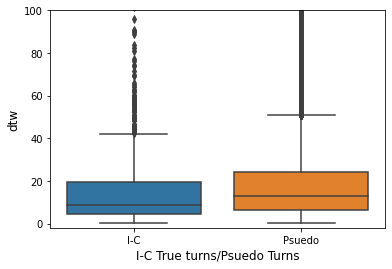

In [58]:
xxx=[None]*(len(dtwall)+len(dtwallo))
for i in range(len(dtwall)):
    xxx[i]="I-C"
for i in range(len(dtwall),len(dtwall)+len(dtwallo)):
    xxx[i]="Psuedo"
compare_dtwtc=np.r_[dtwall[:,0],dtwallo[:,0]]
compare_mdtwtc=np.r_[dtwall[:,1],dtwallo[:,1]]
ax = sns.boxplot(x=xxx, y=compare_dtwtc, linewidth=1.5,whis=1.5)
plt.ylim(-2,100)
plt.xlabel('I-C True turns/Psuedo Turns', fontsize=12)
plt.ylabel('dtw',fontsize=12)
#plt.title('Vocal exchange/Non-vocal exchange')
plt.show()